1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

## 1.Загрузить файл hr.csv.

In [4]:
data = pd.read_csv('HR.csv', sep=',')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [7]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


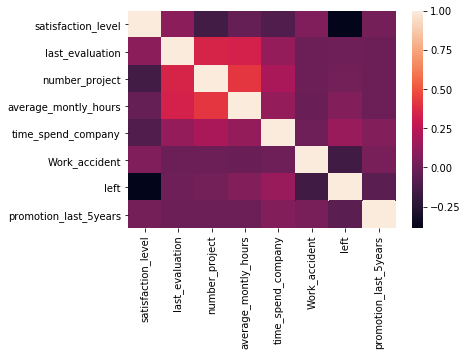

In [8]:
sns.heatmap(data.corr())

Наиболее сильные взаимосвязи:  projects-hours, evaluation-projects, evaluation-hours и satisfaction-left. Сейчас возьмем первые три, к увольнениям вернемся в конце задания.

## 4.Визуализировать несколько взаимосвязей между переменными.

In [56]:
data1=data[['last_evaluation', 'number_project', 'average_montly_hours']]

C:\Users\User\Anaconda31\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


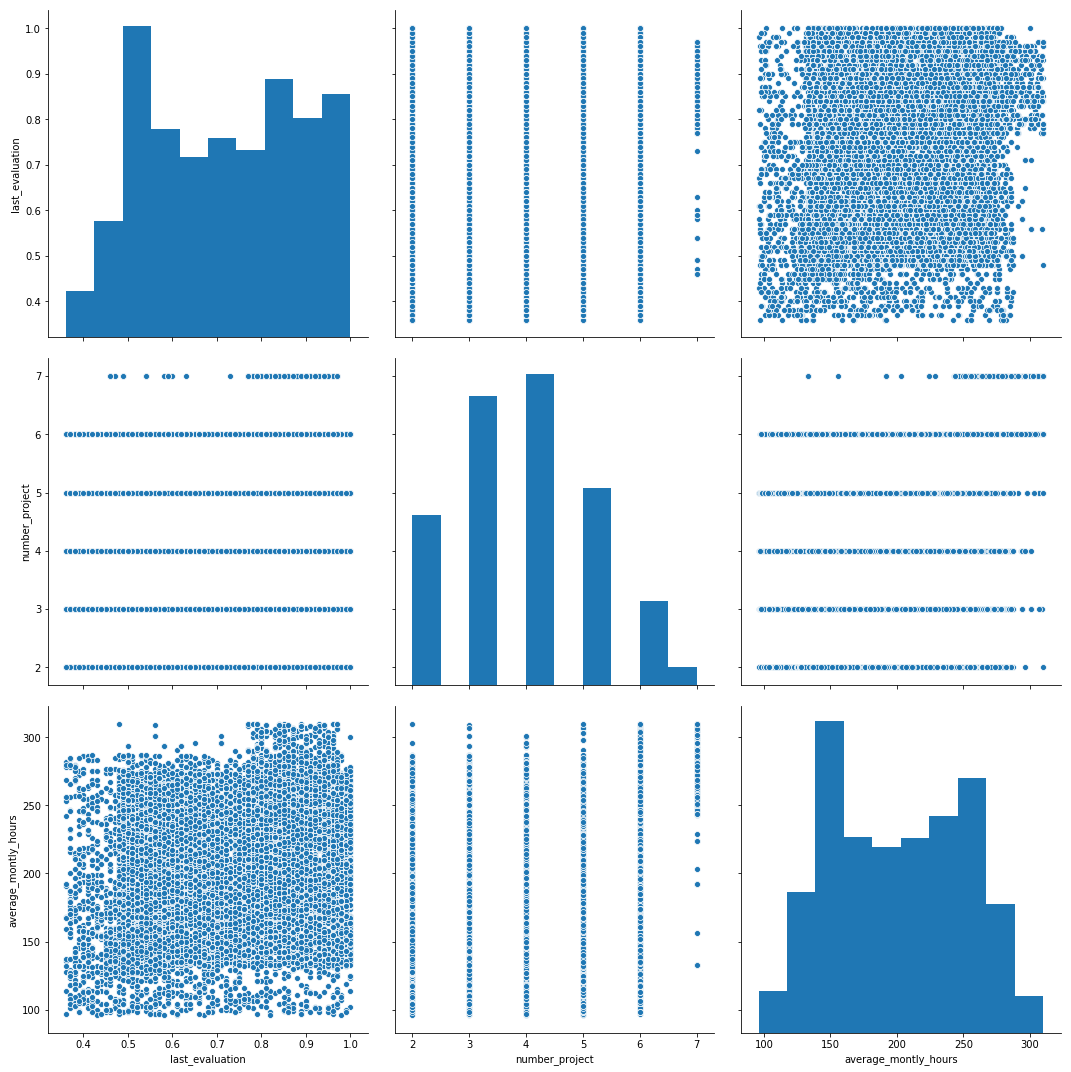

In [65]:
sns.pairplot(data=data1, size=5)
plt.show()

Проекты распределены дискретно от 2 до 7. Причем гистограмма указывает на нормальное распредление. Часы и оценки выглядят странно на первый взгляд. По логике жизни они тоже должны иметь нормальное распределение. Но здесь или несколько пиков, или выброс сразу в двух переменных. Также на скаттерплоте видны несколько прямоугольных областей с большей плотностью точек.


Моя гипотеза в том, что наблюдаемое распределение является суммой распределений неоднородных подгрупп в выборке. Проверим, сгруппировав данные по колличеству проектов.

C:\Users\User\Anaconda31\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


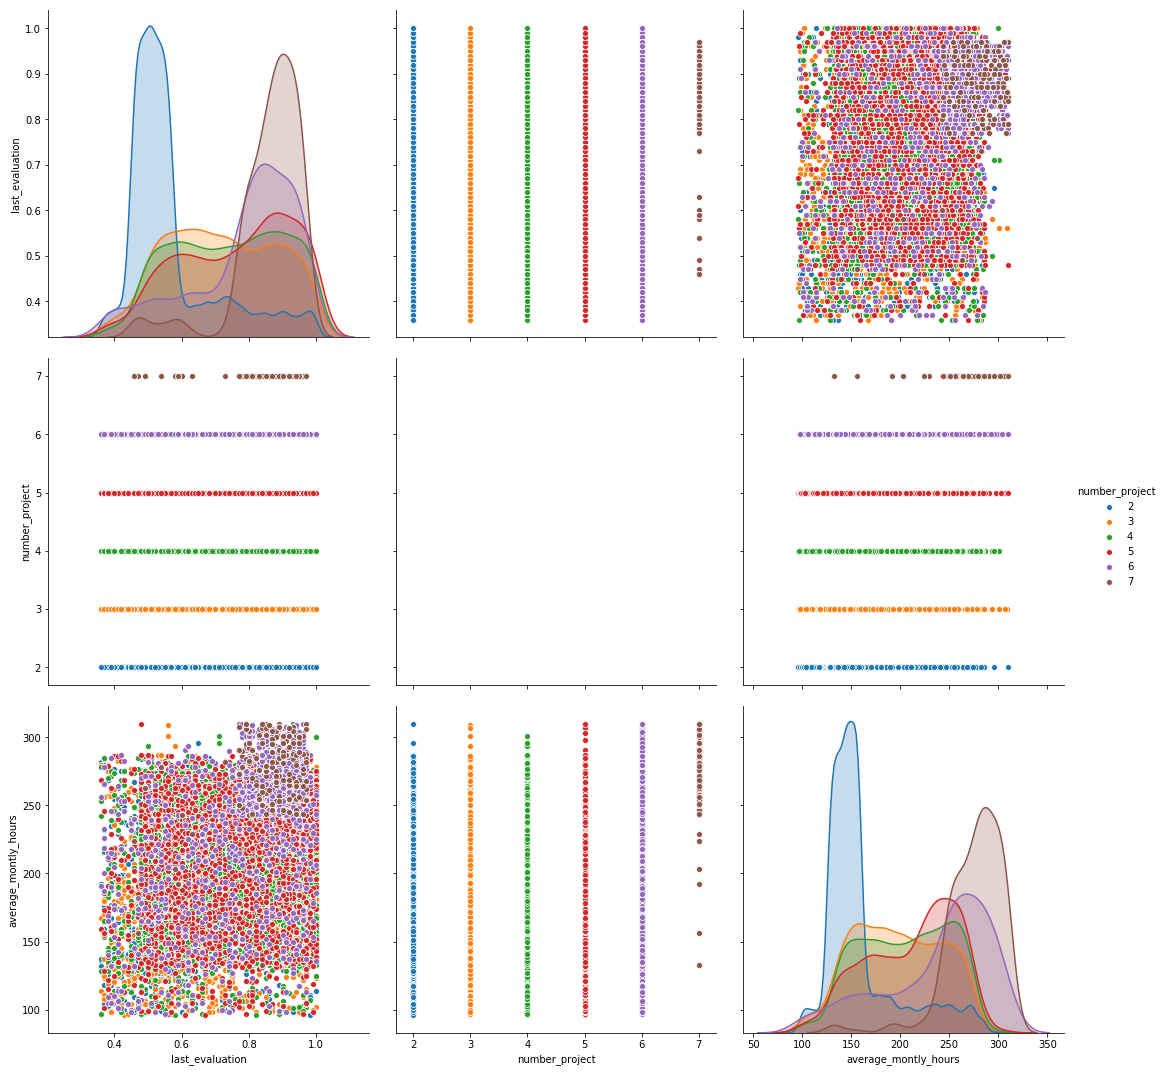

In [63]:
sns.pairplot(data=data1, hue="number_project", size=5)
plt.show()

Итак, теперь все становится на свои места. И часы и оценки распределены нормально внутри грумппы соотвествующей каждому значению прокектов. Вполне логично, что центр распределения группы с наименьшим колличеством прооектов смещен к началу шкалы оценок и переработок, а группа, занимающаяся 7 проектами, тратит больше времени и получает высокие оценки.

Области плотности на точечном графике также оказались связанными с колличеством проектов. Верхний правый прямоугольник - группа с 7 проектами.

На мой взгляд, pairplot выше дает наизучшую вищзуализацию взаимозавистимости этих трех переменных.
Ниже построил regplots, они не столь показательны.

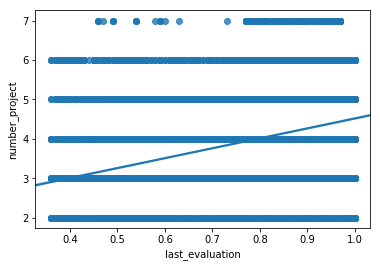

In [69]:
sns.regplot(x= 'last_evaluation', y='number_project',data=data1, fit_reg=True)

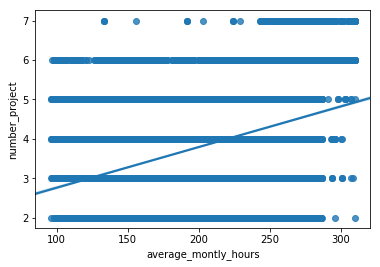

In [71]:
sns.regplot(x= 'average_montly_hours', y='number_project',data=data1, fit_reg=True)

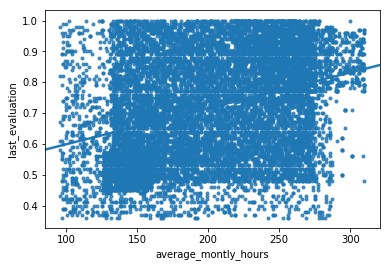

In [74]:
sns.regplot(x= 'average_montly_hours', y='last_evaluation',data=data1, marker='.', fit_reg=True)

## 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [81]:
stats.ttest_ind(data1['average_montly_hours'], data1['last_evaluation'])

Ttest_indResult(statistic=491.25647025928, pvalue=0.0)

In [82]:
stats.ttest_ind(data1['average_montly_hours'], data1['number_project'])

Ttest_indResult(statistic=483.54229603425085, pvalue=0.0)

In [83]:
stats.ttest_ind(data1['number_project'], data1['last_evaluation'])

Ttest_indResult(statistic=303.8042100031241, pvalue=0.0)

Во всех трех случаях pvalue ниже 5%, поэтому pvalue значительно меньше стандартного уровня 5%, принимаем альтернативную гипотезу о статистическом различии выборок.

## 6.Рассчитать сколько работников работает в каждом департаменте.

In [113]:
aq=data.groupby(['sales']).agg({'satisfaction_level':len})
aq.columns=['assosiates quantity']
aq

,assosiates quantity
sales,
IT,1227.0
RandD,787.0
accounting,767.0
hr,739.0
management,630.0
marketing,858.0
product_mng,902.0
sales,4140.0
support,2229.0


## 7.Показать распределение сотрудников по зарплатам.

In [139]:
def salary_convert (d):
    if d=="low":
        dd=1
    elif d=="medium":
        dd=2
    else:
        dd=3
    return (dd)

In [118]:
data['salary_n']=data['salary'].apply(lambda x: salary_convert(x))

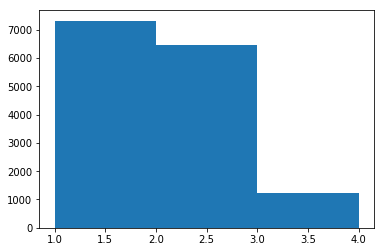

In [140]:
plt.hist(data['salary_n'],bins=[1, 2, 3, 4])
plt.show()

Получилась "лестница". Средних зарплат меньше, чем маленьких, высоких еще меньше.

## 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [142]:
data2=data[['salary_n','sales']]

C:\Users\User\Anaconda31\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


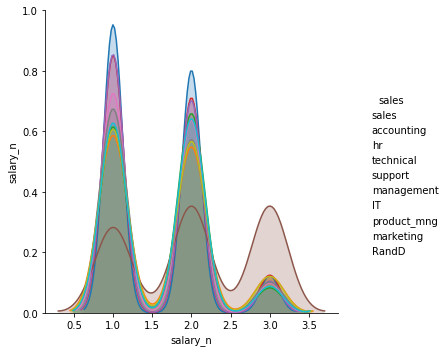

In [147]:
sns.pairplot(data=data2, hue='sales', size=5)
plt.show()

Если смотреть, в разрезе отделов, то "лестница" повторяется по всем отделам, кроме мэнеджмента. Видимо высшее руководство компании в этой  таблице выделено в специальный отдел. У менеджемнта зарплаты распределены скорее равномерно.

## 9.Сколько сотрудников покинули компанию.

In [148]:
data.groupby(['left']).agg({'satisfaction_level':len})

,satisfaction_level
left,
0,11428.0
1,3571.0


Компанию покинул 3571 сотрудник

## 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

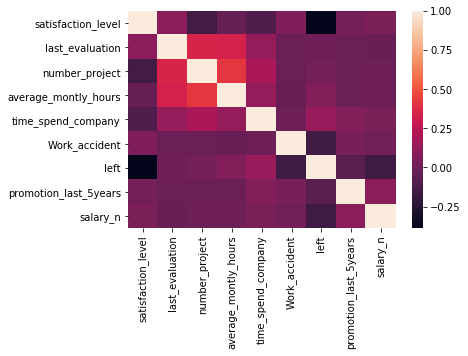

In [149]:
sns.heatmap(data.corr())

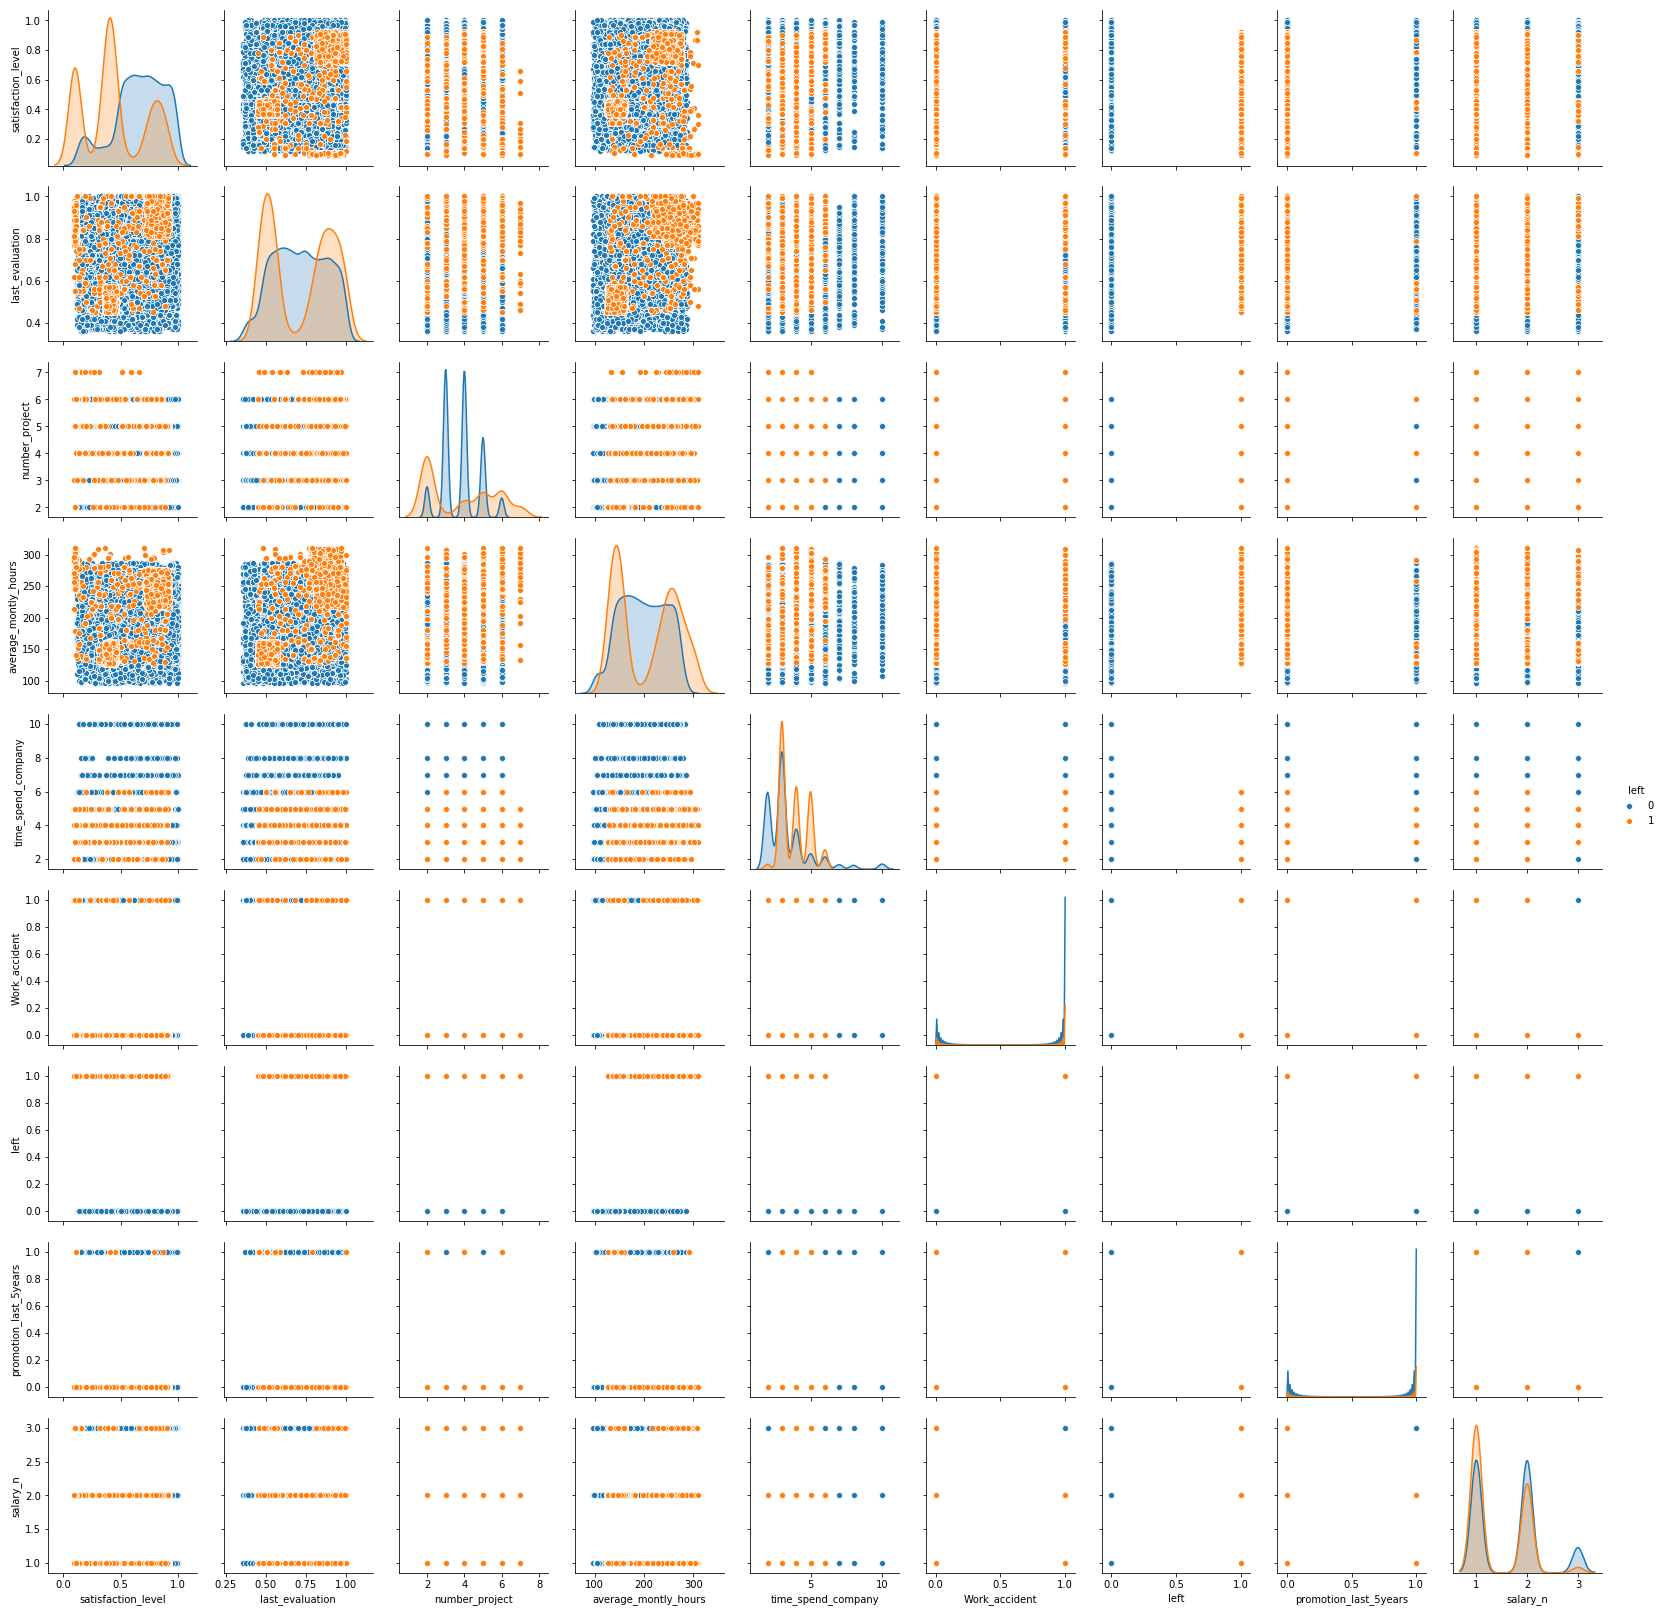

In [152]:
sns.pairplot(data=data, hue="left")

Переменные не имеют значительной корреляции. Также на гистограммах мы наблюдаем несколько пиков.Скорее всего уволенные представлены несколькими неоднородными группами. Проверим 2 гипотезы. 1-увольняются те, кто недоволен работой. 2- увольняют тех, кто плохо работает.

Гипотеза 1.  увольняются сотрудники с низкой удовлетворенностью.

In [174]:
data[['left', 'satisfaction_level']].corr()

,left,satisfaction_level
left,1.000000,-0.388375
satisfaction_level,-0.388375,1.000000


Есть отрицательная корреляция. Чем меньше удовлетворенность, тем выше вероятность того, что сотрудник окажется уволенным.

In [175]:
stats.ttest_ind(data[data['left']==1]['satisfaction_level'],data[data['left']==0]['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

pvalue  мене 0.05, что говорит о статистической несхожести группы уволенных и неуволенных.

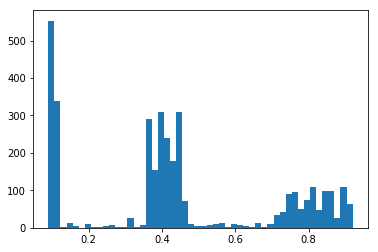

In [187]:
plt.hist(data[data['left']==1]['satisfaction_level'],50)
plt.show()

Есть несколько пиков. Первый- очевидно сотрудники крайне неудовлетворенные работой. 

In [169]:
data[data['satisfaction_level']<0.12].groupby(['left']).agg({'satisfaction_level':len})

,satisfaction_level
left,
1,888.0


Группа с удовлетворенностью ниже 0.12 представлена исключительно уволенными. Скорее всего это соотвествует минимальным оценкам в опроснике по удовлетворенности, 0 там обычно не бывает.

In [ ]:
Гипотеза 2.  увольняются сотрудники с низкой результативностью. делают мало работы, и она низко оценена.

In [246]:
data[['left', 'last_evaluation', 'number_project', 'average_montly_hours']].corr()

,left,last_evaluation,number_project,average_montly_hours
left,1.000000,0.006567,0.023787,0.071287
last_evaluation,0.006567,1.000000,0.349333,0.339742
number_project,0.023787,0.349333,1.000000,0.417211
average_montly_hours,0.071287,0.339742,0.417211,1.000000


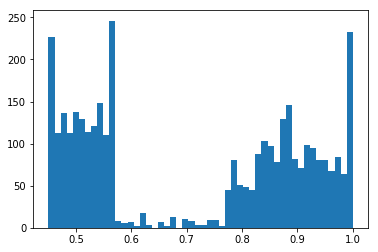

In [188]:
plt.hist(data[data['left']==1]['last_evaluation'],50)
plt.show()

в оценке также есть два пика. Один на низкой оценке, скорее всего предстапвляет низкоэффективных сотрудников, которых уволили.

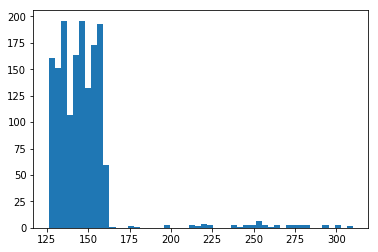

In [234]:
plt.hist(data[(data['left']==1)&(data['last_evaluation']<0.58)]['average_montly_hours'],50)
plt.show()

In [ ]:
number_project

явный перекос в сторону меньшего колличества часов. 

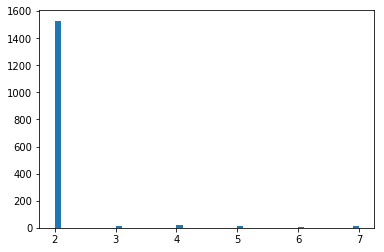

In [240]:
plt.hist(data[(data['left']==1)&(data['last_evaluation']<0.58)]['number_project'],50)
plt.show()

Логично, что по проектам то же самое.

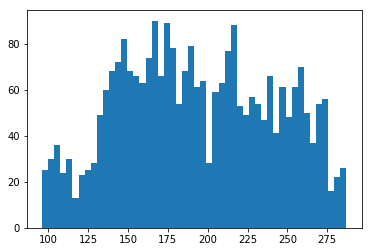

In [241]:
plt.hist(data[(data['left']==0)&(data['last_evaluation']<0.58)]['average_montly_hours'],50)
plt.show()

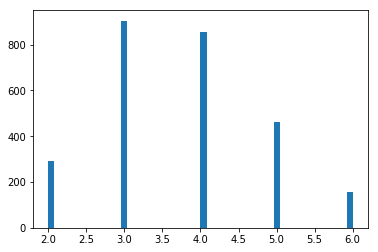

In [242]:
plt.hist(data[(data['left']==0)&(data['last_evaluation']<0.58)]['number_project'],50)
plt.show()

In [247]:
stats.ttest_ind(data[(data['left']==1)&(data['last_evaluation']<0.58)]['average_montly_hours'],data[(data['left']==0)&(data['last_evaluation']<0.58)]['average_montly_hours'])

Ttest_indResult(statistic=-35.52589546486556, pvalue=2.3417015127220926e-242)

In [248]:
stats.ttest_ind(data[(data['left']==1)&(data['last_evaluation']<0.58)]['number_project'],data[(data['left']==0)&(data['last_evaluation']<0.58)]['number_project'])

Ttest_indResult(statistic=-56.27601127268658, pvalue=0.0)

А вот среди работающих распределение подчиняется нормальному закону.

In [243]:
data_lp=data[(data['last_evaluation']<=0.58)&(data['number_project']<=2)]

In [244]:
data_lp.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_n
count,1836.000000,1836.000000,1836.0,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,0.434662,0.505594,2.0,150.278867,3.089325,0.070806,0.833333,0.015251,1.457516
std,0.104263,0.043999,0.0,28.084567,0.664946,0.256571,0.372780,0.122581,0.579244
min,0.100000,0.360000,2.0,98.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.380000,0.470000,2.0,135.000000,3.000000,0.000000,1.000000,0.000000,1.000000
50%,0.410000,0.510000,2.0,145.000000,3.000000,0.000000,1.000000,0.000000,1.000000
75%,0.440000,0.540000,2.0,155.000000,3.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,0.580000,2.0,286.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [245]:
data_lp.groupby(['left']).agg({'satisfaction_level':len})

,satisfaction_level
left,
0,306.0
1,1530.0


 В группе low performers доля уволенных возросла до 83,3% против 23,8% в генеральной совкупности. Также эта группа содержит почти половину всех уволенных.